In [0]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

In [0]:
dataset = load_iris()

In [64]:
iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
iris = iris.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
iris.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [0]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [0]:
iris = StandardScaler().fit_transform(iris)

In [0]:
setosa = iris[0:50, :]
setosa_target = dataset.target[0:50]
versicolor = iris[50:100, :]
versicolor_target = dataset.target[50:100]
virginica = iris[100:150, :]
virginica_target = dataset.target[100:150]

x1 = np.concatenate((setosa, versicolor), axis=0)
y1 = np.concatenate((setosa_target, versicolor_target), axis=0)

x2 = np.concatenate((versicolor, virginica), axis=0)
y2 = np.concatenate((versicolor_target, virginica_target), axis=0)

x3 = np.concatenate((setosa, virginica), axis=0)
y3 = np.concatenate((setosa_target, virginica_target), axis=0)

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3)

In [70]:
clf1 = svm.SVC(kernel='linear') 
clf1.fit(X_train1, y_train1)

clf2 = svm.SVC(kernel='linear') 
clf2.fit(X_train2, y_train2)

clf3 = svm.SVC(kernel='linear') 
clf3.fit(X_train3, y_train3)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
def plot_graph(X_train, y_train, X_test, y_test, model, title): 
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired, label='Train Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, marker='*', cmap=plt.cm.Paired, label='Test Data')

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    Z = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vector')
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')
    ax.legend()
    plt.title(title)
    plt.show()

In [0]:
from sklearn.metrics import classification_report

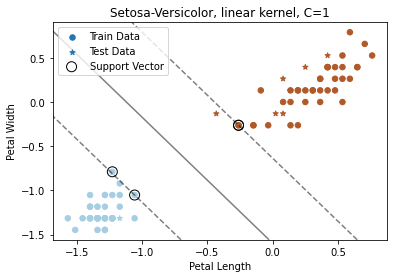

In [73]:
plot_graph(X_train1, y_train1, X_test1, y_test1, clf1, 'Setosa-Versicolor, linear kernel, C=1')

In [74]:
y_pred1 = clf1.predict(X_test1)
print(classification_report(y_test1, y_pred1, target_names=['Setosa', 'Versicolor']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



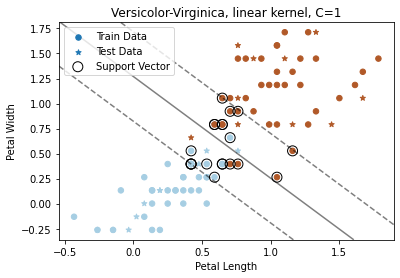

In [75]:
plot_graph(X_train2, y_train2, X_test2, y_test2, clf2, 'Versicolor-Virginica, linear kernel, C=1')

In [76]:
y_pred2 = clf2.predict(X_test2)
print(classification_report(y_test2, y_pred2, target_names=['Versicolor', 'Virginica']))

              precision    recall  f1-score   support

  Versicolor       0.92      0.92      0.92        12
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



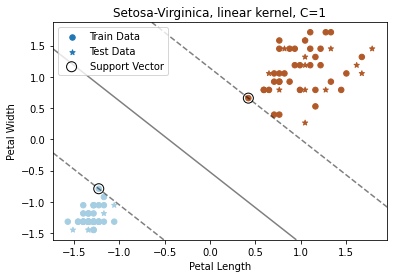

In [77]:
plot_graph(X_train3, y_train3, X_test3, y_test3, clf3, 'Setosa-Virginica, linear kernel, C=1')

In [78]:
y_pred3 = clf3.predict(X_test3)
print(classification_report(y_test3, y_pred3, target_names=['Setosa', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [0]:
def plot_graph_rbf(X_train, y_train, X_test, y_test, model, title): 
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired, label='Train Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, marker='*', cmap=plt.cm.Paired, label='Test Data')

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    Z = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')
    plt.title(title)
    ax.legend()
    plt.show()

In [92]:
clf11 = svm.SVC(kernel='linear', C=0.001) 
clf11.fit(X_train1, y_train1)

clf22 = svm.SVC(kernel='linear', C=0.001) 
clf22.fit(X_train2, y_train2)

clf33 = svm.SVC(kernel='linear', C=0.001) 
clf33.fit(X_train3, y_train3)

y_pred11 = clf11.predict(X_test1)
print(classification_report(y_test1, y_pred11, target_names=['Setosa', 'Versicolor']))

y_pred22 = clf22.predict(X_test2)
print(classification_report(y_test2, y_pred22, target_names=['Versicolor', 'Virginica']))

y_pred33 = clf33.predict(X_test3)
print(classification_report(y_test3, y_pred33, target_names=['Setosa', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       0.00      0.00      0.00        13
  Versicolor       0.48      1.00      0.65        12

    accuracy                           0.48        25
   macro avg       0.24      0.50      0.32        25
weighted avg       0.23      0.48      0.31        25

              precision    recall  f1-score   support

  Versicolor       0.48      1.00      0.65        12
   Virginica       0.00      0.00      0.00        13

    accuracy                           0.48        25
   macro avg       0.24      0.50      0.32        25
weighted avg       0.23      0.48      0.31        25

              precision    recall  f1-score   support

      Setosa       0.40      1.00      0.57        10
   Virginica       0.00      0.00      0.00        15

    accuracy                           0.40        25
   macro avg       0.20      0.50      0.29        25
weighted avg       0.16      0.40      0.23        25



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
clf11 = svm.SVC(kernel='linear', C=1000) 
clf11.fit(X_train1, y_train1)

clf22 = svm.SVC(kernel='linear', C=1000) 
clf22.fit(X_train2, y_train2)

clf33 = svm.SVC(kernel='linear', C=1000) 
clf33.fit(X_train3, y_train3)

y_pred11 = clf11.predict(X_test1)
print(classification_report(y_test1, y_pred11, target_names=['Setosa', 'Versicolor']))

y_pred22 = clf22.predict(X_test2)
print(classification_report(y_test2, y_pred22, target_names=['Versicolor', 'Virginica']))

y_pred33 = clf33.predict(X_test3)
print(classification_report(y_test3, y_pred33, target_names=['Setosa', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

              precision    recall  f1-score   support

  Versicolor       0.85      0.92      0.88        12
   Virginica       0.92      0.85      0.88        13

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [94]:
clf11 = svm.SVC(kernel='rbf', C=0.001, gamma='auto') 
clf11.fit(X_train1, y_train1)

clf22 = svm.SVC(kernel='rbf', C=0.001, gamma='auto') 
clf22.fit(X_train2, y_train2)

clf33 = svm.SVC(kernel='rbf', C=0.001, gamma='auto') 
clf33.fit(X_train3, y_train3)

y_pred11 = clf11.predict(X_test1)
print(classification_report(y_test1, y_pred11, target_names=['Setosa', 'Versicolor']))

y_pred22 = clf22.predict(X_test2)
print(classification_report(y_test2, y_pred22, target_names=['Versicolor', 'Virginica']))

y_pred33 = clf33.predict(X_test3)
print(classification_report(y_test3, y_pred33, target_names=['Setosa', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       0.00      0.00      0.00        13
  Versicolor       0.48      1.00      0.65        12

    accuracy                           0.48        25
   macro avg       0.24      0.50      0.32        25
weighted avg       0.23      0.48      0.31        25

              precision    recall  f1-score   support

  Versicolor       0.48      1.00      0.65        12
   Virginica       0.00      0.00      0.00        13

    accuracy                           0.48        25
   macro avg       0.24      0.50      0.32        25
weighted avg       0.23      0.48      0.31        25

              precision    recall  f1-score   support

      Setosa       0.40      1.00      0.57        10
   Virginica       0.00      0.00      0.00        15

    accuracy                           0.40        25
   macro avg       0.20      0.50      0.29        25
weighted avg       0.16      0.40      0.23        25



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


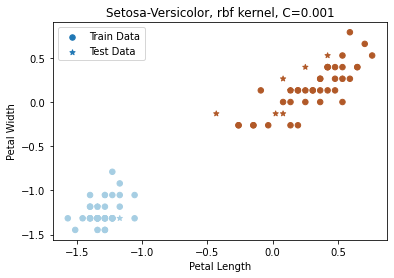

In [95]:
plot_graph_rbf(X_train1, y_train1, X_test1, y_test1, clf11, 'Setosa-Versicolor, rbf kernel, C=0.001')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


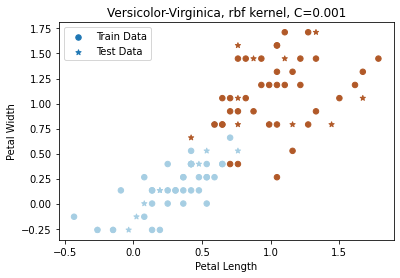

In [96]:
plot_graph_rbf(X_train2, y_train2, X_test2, y_test2, clf22, 'Versicolor-Virginica, rbf kernel, C=0.001')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


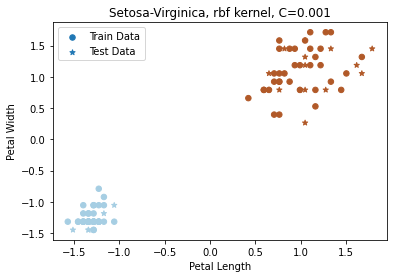

In [97]:
plot_graph_rbf(X_train3, y_train3, X_test3, y_test3, clf33, 'Setosa-Virginica, rbf kernel, C=0.001')

In [98]:
clf11 = svm.SVC(kernel='rbf', C=1) 
clf11.fit(X_train1, y_train1)

clf22 = svm.SVC(kernel='rbf', C=1) 
clf22.fit(X_train2, y_train2)

clf33 = svm.SVC(kernel='rbf', C=1) 
clf33.fit(X_train3, y_train3)

y_pred11 = clf11.predict(X_test1)
print(classification_report(y_test1, y_pred11, target_names=['Setosa', 'Versicolor']))

y_pred22 = clf22.predict(X_test2)
print(classification_report(y_test2, y_pred22, target_names=['Versicolor', 'Virginica']))

y_pred33 = clf33.predict(X_test3)
print(classification_report(y_test3, y_pred33, target_names=['Setosa', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

              precision    recall  f1-score   support

  Versicolor       0.92      0.92      0.92        12
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



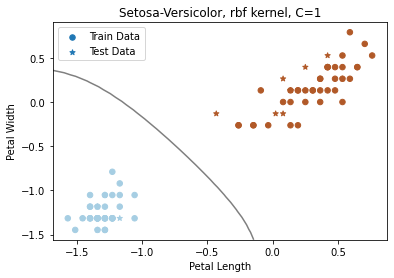

In [99]:
plot_graph_rbf(X_train1, y_train1, X_test1, y_test1, clf11, 'Setosa-Versicolor, rbf kernel, C=1')

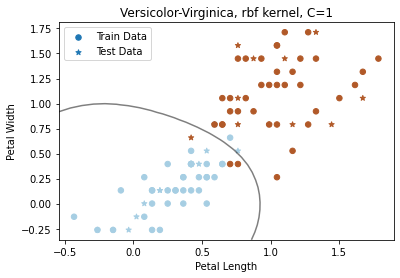

In [100]:
plot_graph_rbf(X_train2, y_train2, X_test2, y_test2, clf22, 'Versicolor-Virginica, rbf kernel, C=1')

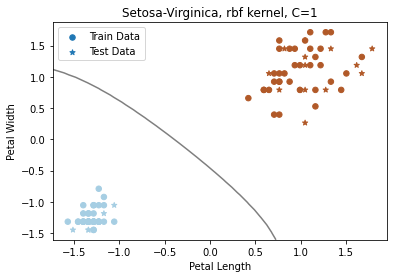

In [101]:
plot_graph_rbf(X_train3, y_train3, X_test3, y_test3, clf33, 'Setosa-Virginica, rbf kernel, C=1')

In [102]:
clf11 = svm.SVC(kernel='rbf', C=1000) 
clf11.fit(X_train1, y_train1)

clf22 = svm.SVC(kernel='rbf', C=1000) 
clf22.fit(X_train2, y_train2)

clf33 = svm.SVC(kernel='rbf', C=1000) 
clf33.fit(X_train3, y_train3)

y_pred11 = clf11.predict(X_test1)
print(classification_report(y_test1, y_pred11, target_names=['Setosa', 'Versicolor']))

y_pred22 = clf22.predict(X_test2)
print(classification_report(y_test2, y_pred22, target_names=['Versicolor', 'Virginica']))

y_pred33 = clf33.predict(X_test3)
print(classification_report(y_test3, y_pred33, target_names=['Setosa', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

              precision    recall  f1-score   support

  Versicolor       0.92      0.92      0.92        12
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



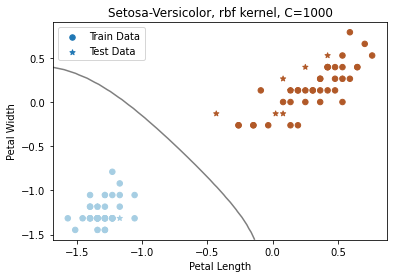

In [103]:
plot_graph_rbf(X_train1, y_train1, X_test1, y_test1, clf11, 'Setosa-Versicolor, rbf kernel, C=1000')

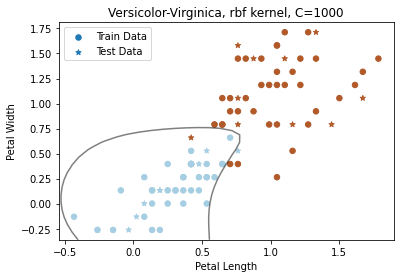

In [104]:
plot_graph_rbf(X_train2, y_train2, X_test2, y_test2, clf22, 'Versicolor-Virginica, rbf kernel, C=1000')

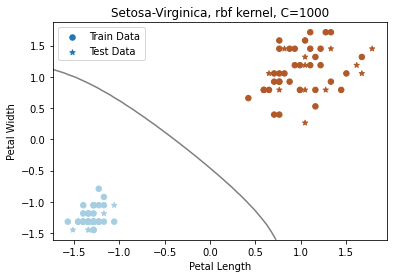

In [105]:
plot_graph_rbf(X_train3, y_train3, X_test3, y_test3, clf33, 'Setosa-Virginica, rbf kernel, C=1000')